## Project 4 - EXPLORATORY DATA ANALYSIS

In [38]:
# importing dependencies

import numpy as np
import pandas as pd
import seaborn as sns


In [39]:
# loading datasets in pandas Dataframe

news_fake_df = pd.read_csv("Resources/fake.csv")
news_true_df = pd.read_csv("Resources/true.csv")

In [40]:
# adding a new predictive column in both dataframes 

news_fake_df['prediction'] = 0
news_true_df['prediction'] = 1

In [41]:
news_fake_df.shape

(23481, 5)

In [42]:
news_true_df.shape

(21417, 5)

In [43]:
# Concadenating both dataframes into a new dataframe

dflist= [news_fake_df,news_true_df] 
news_df = pd.concat(dflist)

news_df.head()

,title,text,subject,date,prediction
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [44]:
# Checking for null values

news_df.isnull().sum()


title         0
text          0
subject       0
date          0
prediction    0
dtype: int64

In [45]:
# Dropping date column 

news_df = news_df.drop("date", axis='columns')
news_df.tail()

,title,text,subject,prediction
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,1



# Analysing data distribution before developing an machine learning model. 


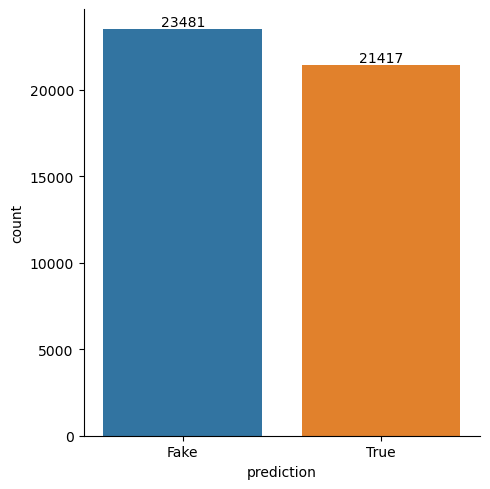

In [46]:

g=sns.catplot(x='prediction',data = news_df , kind ='count')
g.set_xticklabels(["Fake", "True"])
for ax in g.axes.flat:
    
    ax.bar_label(ax.containers[0])


In [47]:
# The percentage of prediction distrubution in the dataset 

print("Percentage of TRUE News : " , (news_true_df.shape[0]/news_df.shape[0]) * 100 )
print("Percentage of FAKE News : " , (news_fake_df.shape[0]/news_df.shape[0]) * 100 )

Percentage of TRUE News :  47.70145663503943
Percentage of FAKE News :  52.29854336496058


In [48]:
xlabels = news_df['subject'].unique().tolist()
xlabels

['News',
 'politics',
 'Government News',
 'left-news',
 'US_News',
 'Middle-east',
 'politicsNews',
 'worldnews']

[Text(0, 0, 'News'),
 Text(1, 0, 'politics'),
 Text(2, 0, 'Government News'),
 Text(3, 0, 'left-news'),
 Text(4, 0, 'US_News'),
 Text(5, 0, 'Middle-east'),
 Text(6, 0, 'politicsNews'),
 Text(7, 0, 'worldnews')]

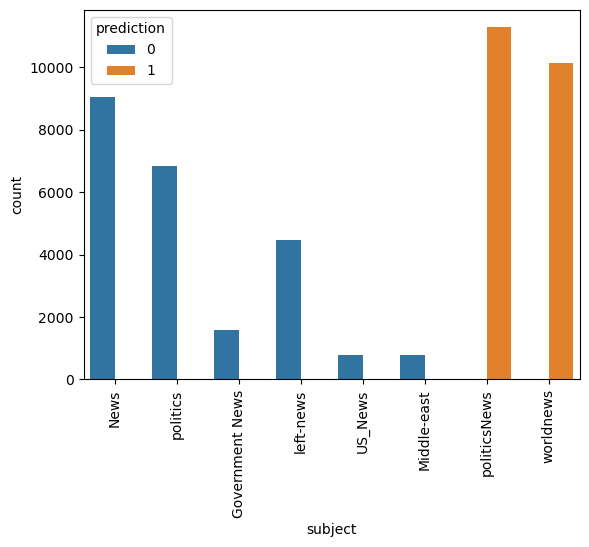

In [49]:
g=sns.countplot(x='subject',hue='prediction',data=news_df)
g.set_xticklabels(g.get_xticklabels(),rotation=90)